In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-27 12:32:46.626353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone14Pro_I(i) dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone14-Pro/iPhone14_pro_I(i)/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.       +0.j        0.0234375+0.0078125j 0.0234375+0.j        ...
 0.0078125+0.015625j  0.       +0.0078125j 0.0078125+0.015625j ]
2048
75121
(2048, 75121)
[0.01839223 0.00957888 0.00355077 ... 0.00201986 0.00381509 0.00977977]
(10000, 2048)
(10000,)
[0.0234375+0.015625j  0.0078125-0.015625j  0.03125  +0.0078125j ...
 0.       -0.0078125j 0.015625 +0.j        0.015625 +0.015625j ]
2048
90700
(2048, 90700)
[0.0186928  0.00969831 0.00361431 ... 0.00185373 0.00362271 0.00991047]
(20000, 2048)
(20000,)
[0.0078125+0.j        0.03125  +0.j        0.       +0.0078125j ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375-0.0078125j]
2048
73583
(2048, 73583)
[0.01858141 0.00973842 0.00332524 ... 0.00217969 0.0040196  0.00976847]
(30000, 2048)
(30000,)
[0.0234375+0.0078125j 0.015625 +0.0078125j 0.015625 -0.0078125j ...
 0.0078125+0.j        0.0078125+0.015625j  0.03125  +0.j       ]
2048
87852
(2048, 87852)
[0.01946594 0.0098984  0.00382288 ... 0.00209648 0.00400435 0.00991102]
(40000, 204

## Cross-model Validation

## iPhone14Pro_I(ii) model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(ii)_model.h5")
model.summary()

2023-02-27 12:55:30.490912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 5.6346 - accuracy: 0.1108
test loss, test acc: [5.634634494781494, 0.11083000153303146]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[2019 2116  678    2  492  117  955 1926 1680   15]
 [ 412 1303 2386    0 1609 1086 2090  191  896   27]
 [1151 2797 1089    0  631  516 1281  739 1779   17]
 [1800 2377  528    3  495  149  592 1380 2655   21]
 [  55  779 4896    0  853 1963 1369   12   73    0]
 [  39   45  244    4 2459 1580 2571   10  486 2562]
 [ 667 1045 1562    0 2039 1006 2061  223 1311   86]
 [1413 2990  569    1  471  217  674 1275 2380   10]
 [ 250 1395 2199    0 1295 1813 2061  123  837   27]
 [ 391 1158 1679    0 1697 1407 1995  252 1358   63]]
              precision    recall  f1-score   support

           0       0.25      0.20      0.22     10000
           1       0.08      0.13      0.10     10000
           2       0.07      0.11      0.08     10000
           3       0.30      0.00      0.00     10000
           4       0.07      0.09      0.08     10000
           5       0.16      0.16      0.16     10000
           6       0.13      0.2

Test Accuracy:0.11083


Text(0.5, 1.0, 'Accuracy:0.111')

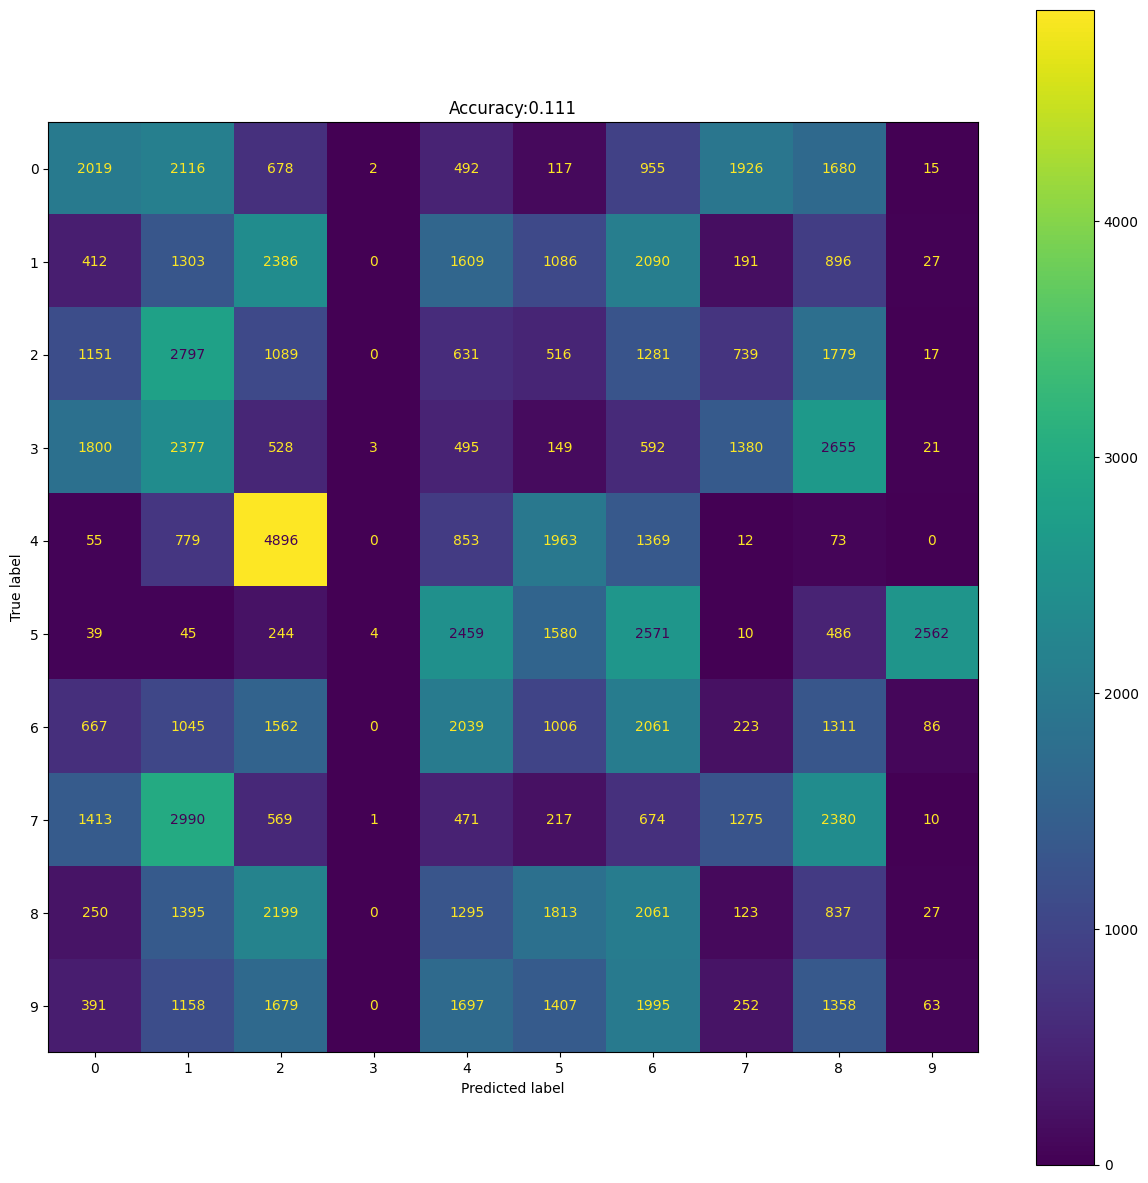

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [10]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 4ms/step - loss: 1.5860 - accuracy: 0.4033
Epoch 2/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.5835 - accuracy: 0.4034
Epoch 3/30
3125/3125 [==============================] - 16s 5ms/step - loss: 1.5812 - accuracy: 0.4045
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5794 - accuracy: 0.4064
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5774 - accuracy: 0.4081
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5755 - accuracy: 0.4078
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5734 - accuracy: 0.4089
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5712 - accuracy: 0.4101
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5696 - accuracy: 0.4108
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

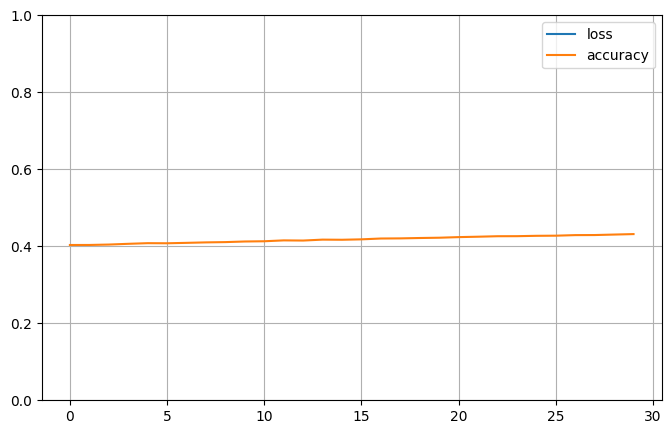

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.5370 - accuracy: 0.4279
test loss, test acc: [1.537016749382019, 0.4278799891471863]


In [13]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[4852  374 1237 2074  144   22  284  280  475  258]
 [ 579 2331 1186  488 1209  312  780   38 2204  873]
 [1395  540 3760 1669  345   61  397  291 1067  475]
 [2157  301 1476 4575   90   38  299  409  409  246]
 [  94  190  251   18 8640   70   81    0  574   82]
 [   5   72   33   14   36 9305  225    0  208  102]
 [ 559 1326 1265  649  598  615 1951   59 2153  825]
 [2297  332 1828 3223  121   27  271 1027  597  277]
 [ 353  953  988  310 1431  355  640   47 4355  568]
 [ 609 1378 1304  503  731  433  760   75 2215 1992]]
              precision    recall  f1-score   support

           0       0.38      0.49      0.42     10000
           1       0.30      0.23      0.26     10000
           2       0.28      0.38      0.32     10000
           3       0.34      0.46      0.39     10000
           4       0.65      0.86      0.74     10000
           5       0.83      0.93      0.88     10000
           6       0.34      0.2

Test Accuracy:0.42788


Text(0.5, 1.0, 'Accuracy:0.428')

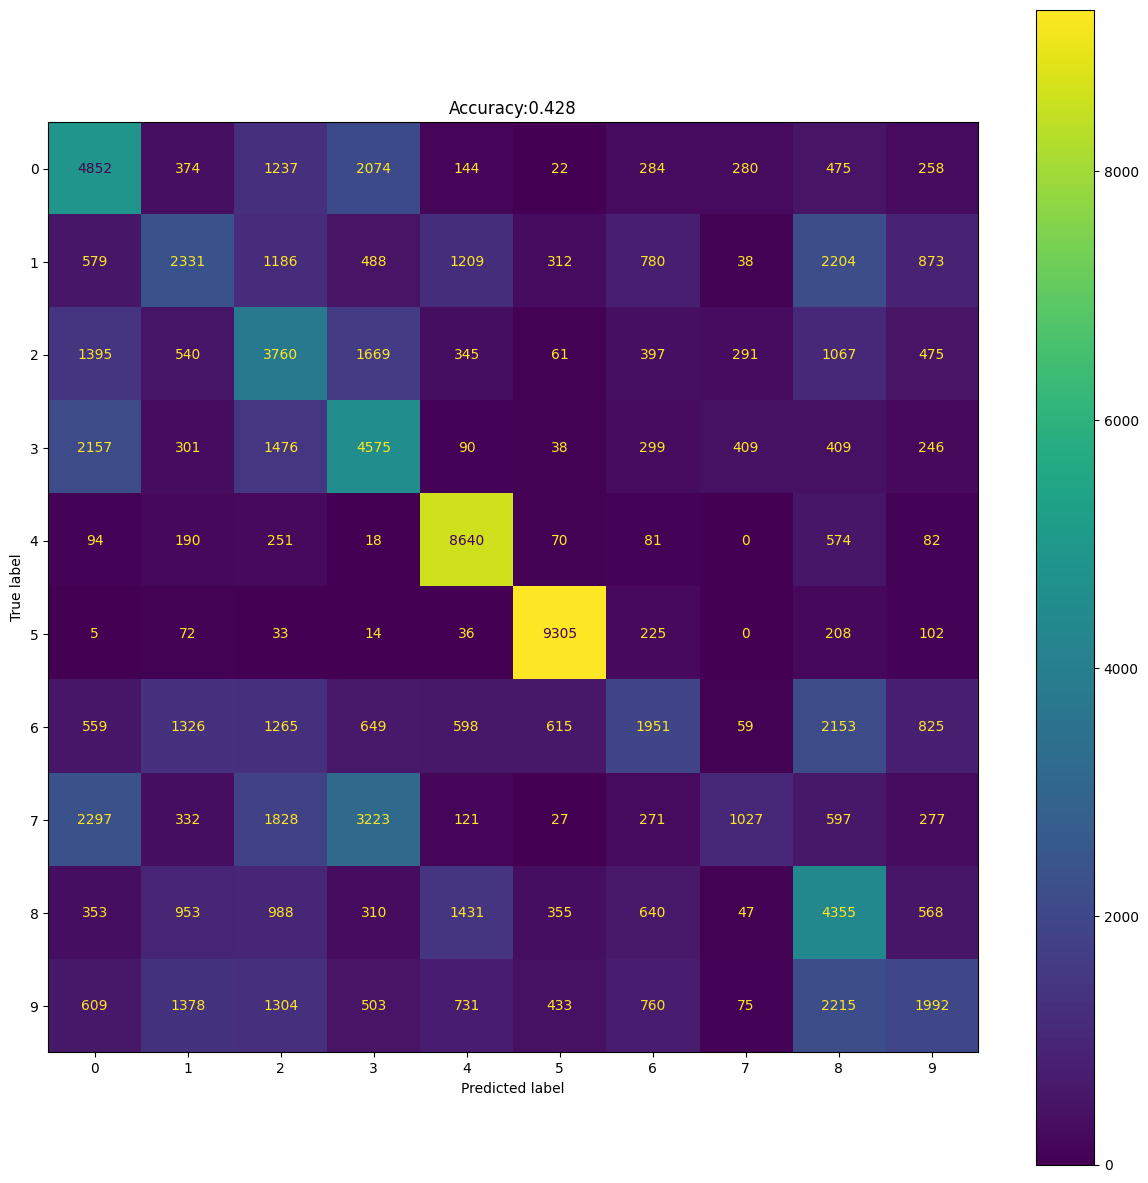

In [14]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(iii) model

Cross-model Validation without training

In [15]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 5.2417 - accuracy: 0.1046
test loss, test acc: [5.241736888885498, 0.10462000221014023]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[1192 1385 1587 1379  417 1408  745  363  779  745]
 [ 623 1650 1366 1232  810  773  886 1145  531  984]
 [ 804 1286 1170 1450  869 1606  827  556  747  685]
 [ 678 1180 1333 1419  976 1691  712  784  662  565]
 [ 526 1204 1354  139  214  662 1820 2044 1177  860]
 [1190  715 1675  654 1084 1022 1194  772  807  887]
 [1063 1287  837 1364  768 1174 1106  986  505  910]
 [ 846 1134 1070 1663  784 1681  959  677  556  630]
 [1280 1352  918 1228  627 1024  939  623 1336  673]
 [ 665 1541 1034 1213  957 1032 1020 1008  854  676]]
              precision    recall  f1-score   support

           0       0.13      0.12      0.13     10000
           1       0.13      0.17      0.15     10000
           2       0.09      0.12      0.10     10000
           3       0.12      0.14      0.13     10000
           4       0.03      0.02      0.02     10000
           5       0.08      0.10      0.09     10000
           6       0.11      0.1

Test Accuracy:0.10462


Text(0.5, 1.0, 'Accuracy:0.105')

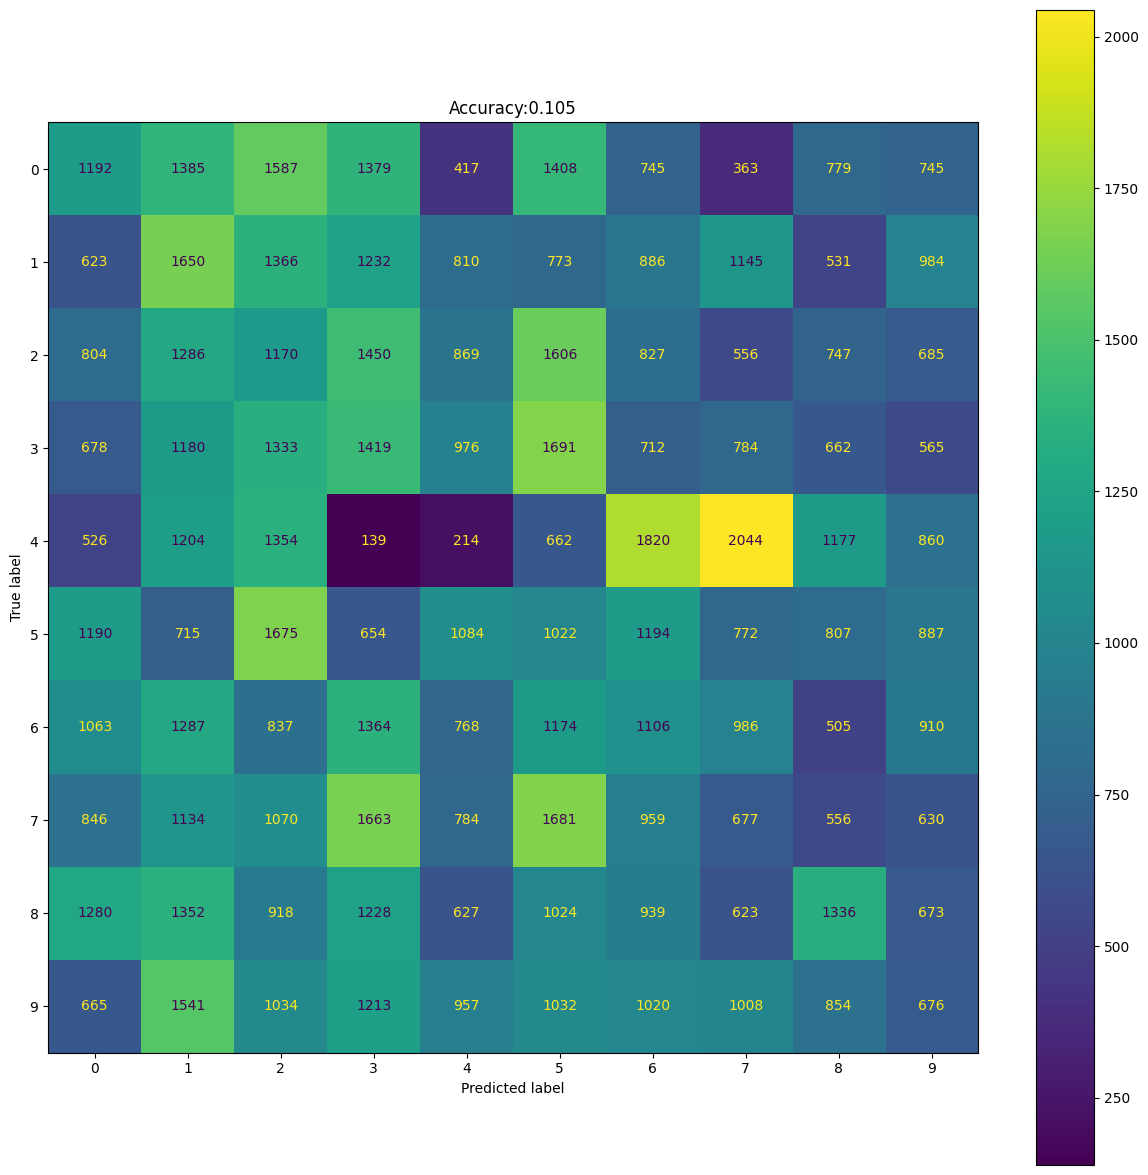

In [18]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [19]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 4.0207 - accuracy: 0.1136
Epoch 2/30
3125/3125 [==============================] - 16s 5ms/step - loss: 2.5840 - accuracy: 0.1557
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2006 - accuracy: 0.2055
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.1203 - accuracy: 0.2285
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.0946 - accuracy: 0.2386
Epoch 6/30
3125/3125 [==============================] - 17s 5ms/step - loss: 2.0822 - accuracy: 0.2435
Epoch 7/30
3125/3125 [==============================] - 16s 5ms/step - loss: 2.0740 - accuracy: 0.2481
Epoch 8/30
3125/3125 [==============================] - 18s 6ms/step - loss: 2.0681 - accuracy: 0.2507
Epoch 9/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.0627 - accuracy: 0.2539
Epoch 10/30
3125/3125 [==============================] - 15s 5ms/step - l

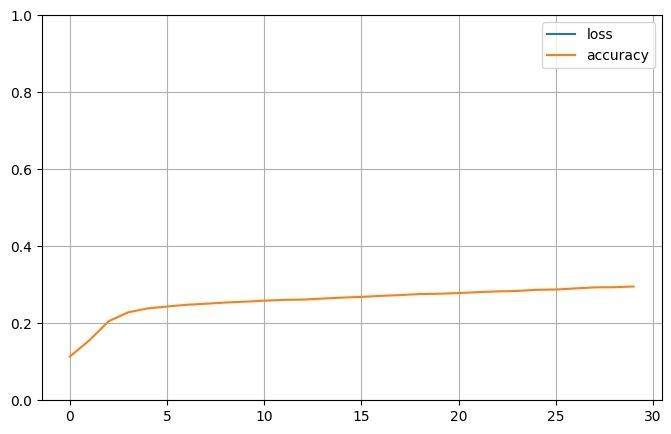

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.9890 - accuracy: 0.2965
test loss, test acc: [1.9889870882034302, 0.29653000831604004]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[2258  433  486  497  651 1751  845 1048 1552  479]
 [ 543 1545  454  383 1047 1667 1421  768 1264  908]
 [ 889  502 1101  611  631 1631 1175 1246 1492  722]
 [ 775  526  551 1192  787 2088  946 1201 1105  829]
 [ 128  189   32   92 7403 1056  265  149  381  305]
 [ 252  245  122  160  849 7283  248  241  413  187]
 [ 586  668  465  322  921 1503 2211 1076 1466  782]
 [ 866  501  538  574  710 1526 1243 2007 1287  748]
 [ 758  481  439  304  888 1519 1021  717 3115  758]
 [ 509  661  435  531 1204 1587 1192  790 1553 1538]]
              precision    recall  f1-score   support

           0       0.30      0.23      0.26     10000
           1       0.27      0.15      0.20     10000
           2       0.24      0.11      0.15     10000
           3       0.26      0.12      0.16     10000
           4       0.49      0.74      0.59     10000
           5       0.34      0.73      0.46     10000
           6       0.21      0.2

Test Accuracy:0.29653


Text(0.5, 1.0, 'Accuracy:0.297')

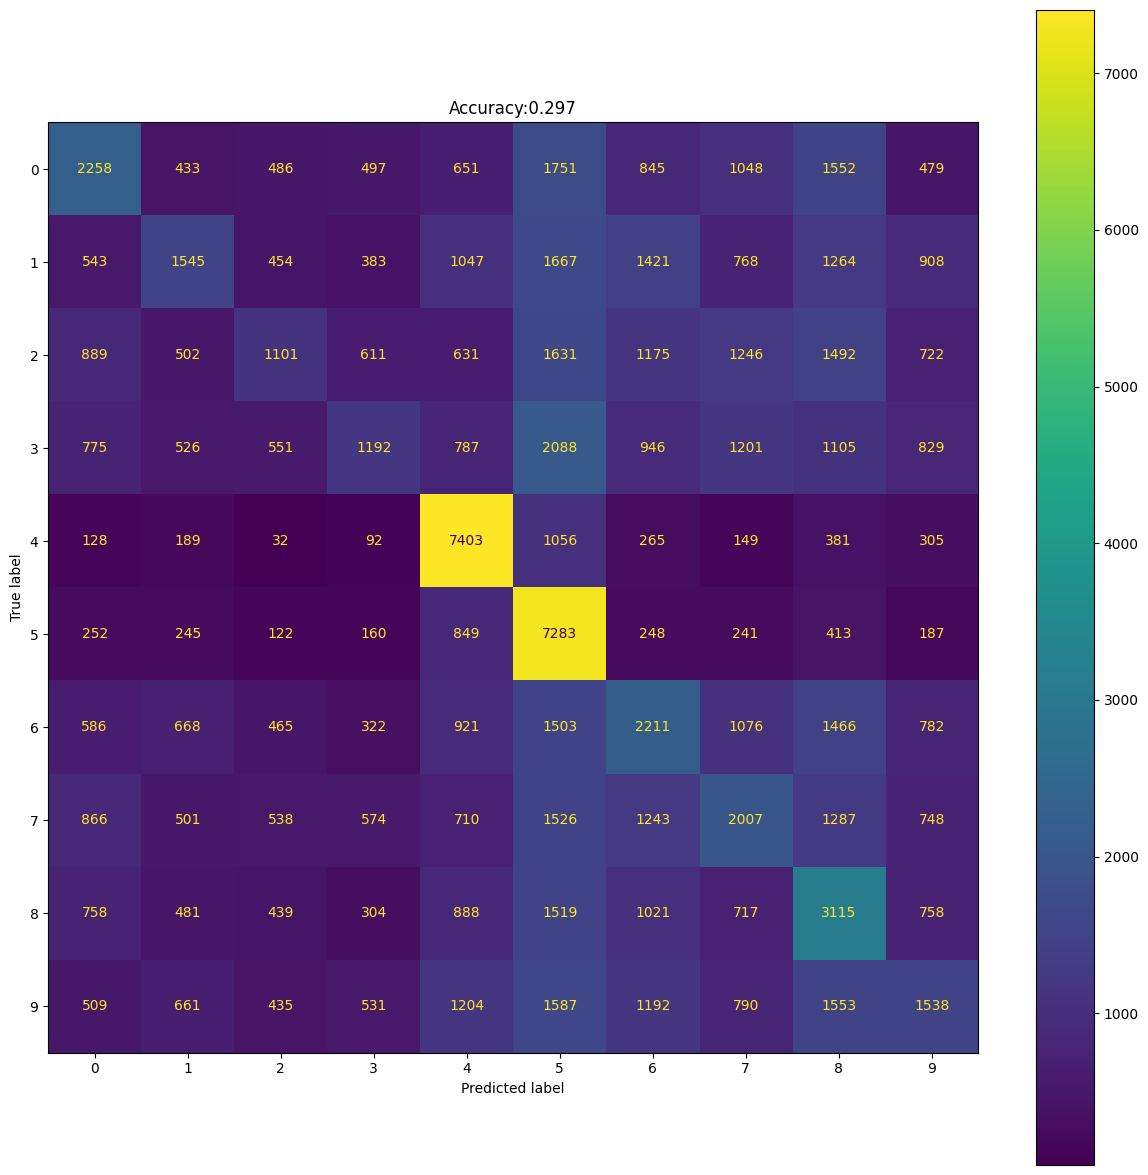

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(iv) model

Cross-model Validation without training

In [25]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iv)_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [26]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 6.3319 - accuracy: 0.0916
test loss, test acc: [6.3319411277771, 0.091559998691082]


In [27]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[ 235  174  742 1767  336 1516  895  527 2428 1380]
 [ 991 1204 1725  815 1076  788 1765  906  322  408]
 [ 521  391 1424 1031  628 1406 1035  728 1319 1517]
 [ 148  158  816 2387  587 1201  445  370 2038 1850]
 [2823  853  953   84  673  482 2223 1272  105  532]
 [1300 4491 1460   71  802   95  696  865   15  205]
 [ 710  800 1217  716 1305 1135 1637 1078  434  968]
 [ 104  190  971 2318  592 1319  396  259 1818 2033]
 [1181  757 1117  395  839 1089 1897 1430  474  821]
 [ 898  986 1586  927  915  803 1901  732  484  768]]
              precision    recall  f1-score   support

           0       0.03      0.02      0.02     10000
           1       0.12      0.12      0.12     10000
           2       0.12      0.14      0.13     10000
           3       0.23      0.24      0.23     10000
           4       0.09      0.07      0.08     10000
           5       0.01      0.01      0.01     10000
           6       0.13      0.1

Test Accuracy:0.09156


Text(0.5, 1.0, 'Accuracy:0.092')

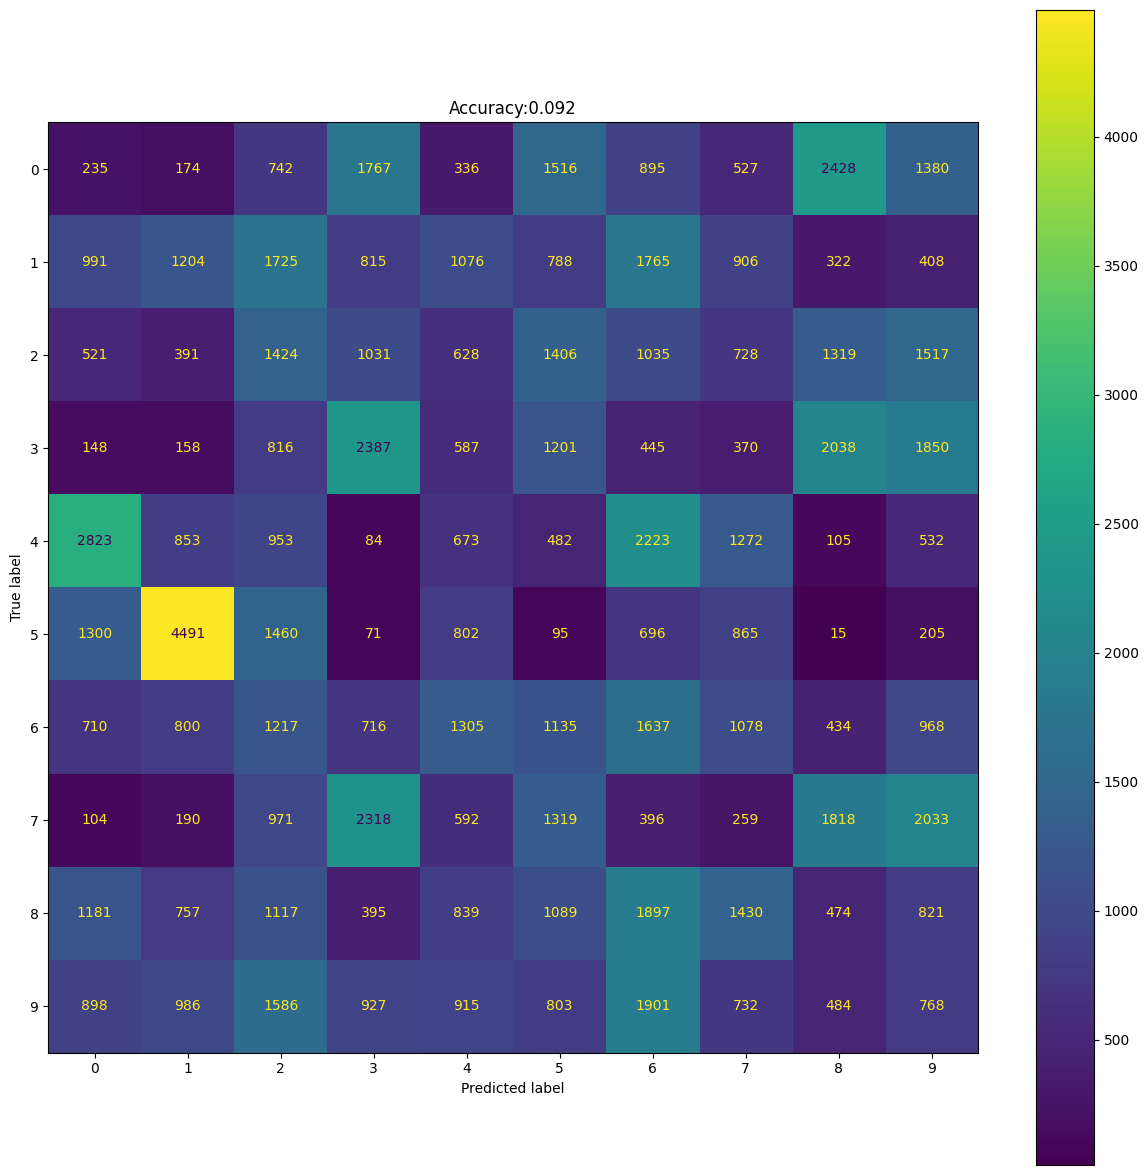

In [28]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [29]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [30]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 14s 4ms/step - loss: 3.8156 - accuracy: 0.1381
Epoch 2/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.1311 - accuracy: 0.2437
Epoch 3/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.9097 - accuracy: 0.2842
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.8612 - accuracy: 0.3001
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.8430 - accuracy: 0.3054
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.8332 - accuracy: 0.3112
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.8264 - accuracy: 0.3134
Epoch 8/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.8213 - accuracy: 0.3146
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.8164 - accuracy: 0.3177
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

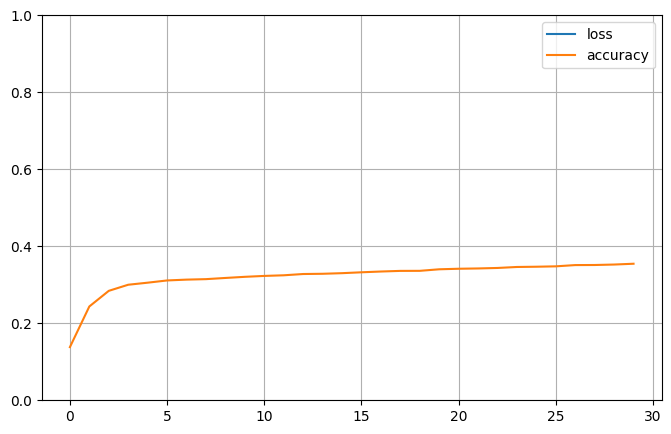

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [32]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.7487 - accuracy: 0.3521
test loss, test acc: [1.7487437725067139, 0.3521000146865845]


In [33]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 15s 5ms/step
[[3142  626 1040  905  171   61  540 2877  428  210]
 [ 401 3248  625  186 1406 1115 1206  629  804  380]
 [1301 1152 1962  539  625  246 1021 2143  709  302]
 [1655  547  789 1784   92   57  555 4118  236  167]
 [ 115  619  306   21 7060  914  514   95  245  111]
 [  10  590   65    8 1004 7585  389   47  157  145]
 [ 517 1679  822  253 1433  708 2483  940  856  309]
 [1314  531  751  806   86   75  585 5485  185  182]
 [ 580 1792  896  191 1915  680 1400  607 1613  326]
 [ 606 2079  880  265 1335  819 1381 1012  775  848]]
              precision    recall  f1-score   support

           0       0.33      0.31      0.32     10000
           1       0.25      0.32      0.28     10000
           2       0.24      0.20      0.22     10000
           3       0.36      0.18      0.24     10000
           4       0.47      0.71      0.56     10000
           5       0.62      0.76      0.68     10000
           6       0.25      0.2

Test Accuracy:0.3521


Text(0.5, 1.0, 'Accuracy:0.352')

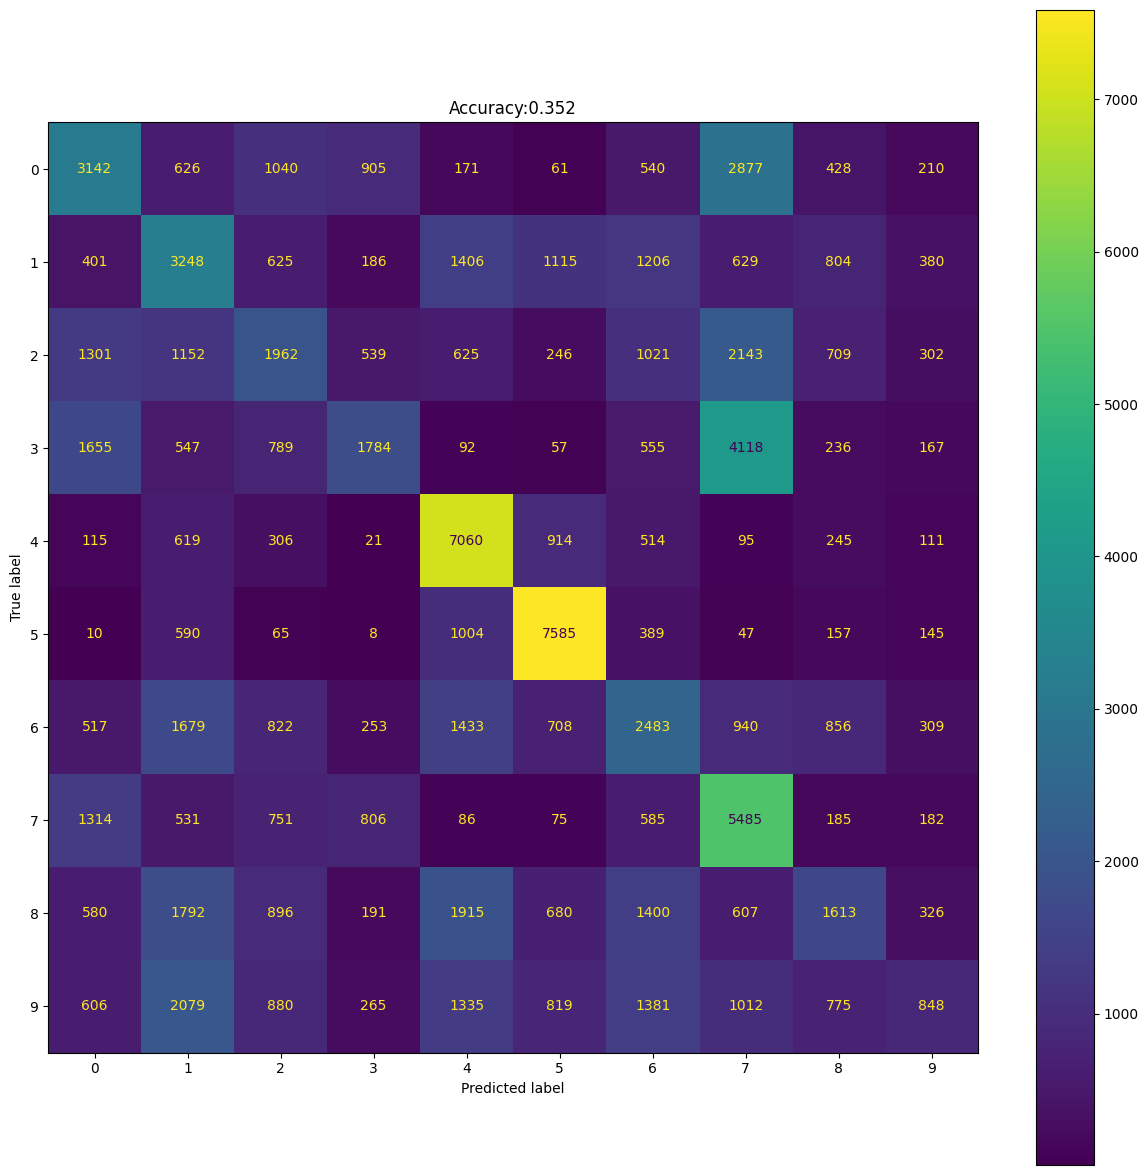

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(v) model

Cross-model Validation without training

In [39]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(v)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [40]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 5ms/step - loss: 17.7961 - accuracy: 0.0999
test loss, test acc: [17.796117782592773, 0.09993000328540802]


In [41]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[  13    0    0    0    0    0    2 9985    0    0]
 [   7    0    0    0    0    0    3 9990    0    0]
 [  19    0    0    0    0    0    8 9973    0    0]
 [  11    0    0    0    0    0    1 9988    0    0]
 [ 285    0    0    0    0    0  718 8997    0    0]
 [  23    0    0    0    0    0 1211 8766    0    0]
 [  39    0    0    0    0    0   10 9951    0    0]
 [  27    0    0    0    0    0    3 9970    0    0]
 [  26    0    0    0    0    0    8 9966    0    0]
 [  20    0    0    0    0    0    6 9974    0    0]]
              precision    recall  f1-score   support

           0       0.03      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.01      0.0

Test Accuracy:0.09993


Text(0.5, 1.0, 'Accuracy:0.100')

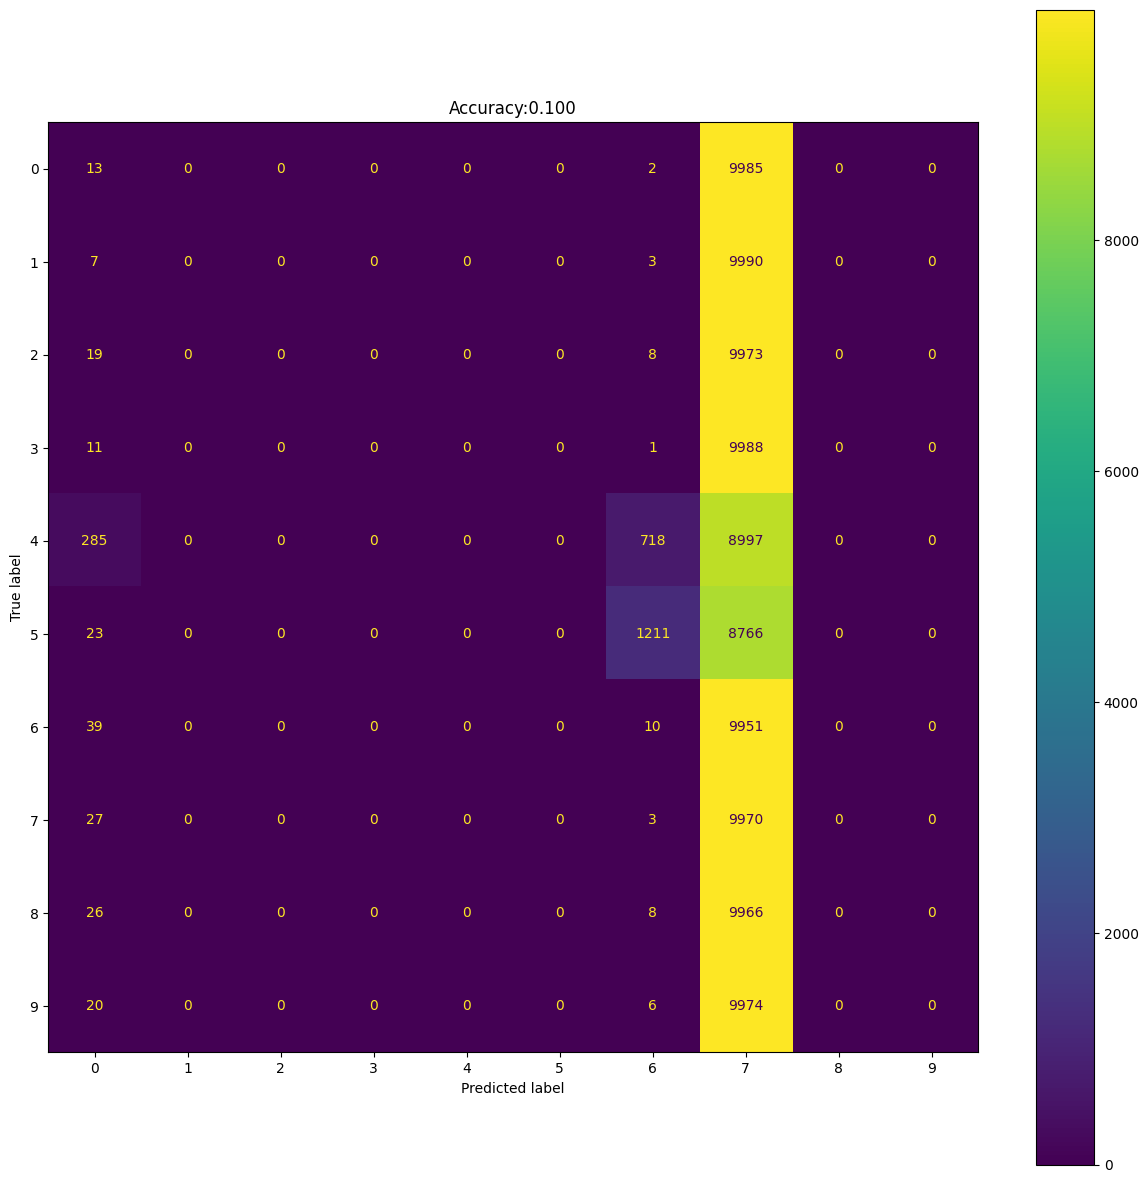

In [42]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [43]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [44]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 2.9932 - accuracy: 0.1147
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.1602 - accuracy: 0.2098
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.0215 - accuracy: 0.2541
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.9743 - accuracy: 0.2677
Epoch 5/30
3125/3125 [==============================] - 11s 3ms/step - loss: 1.9485 - accuracy: 0.2749
Epoch 6/30
3125/3125 [==============================] - 10s 3ms/step - loss: 1.9330 - accuracy: 0.2798
Epoch 7/30
3125/3125 [==============================] - 10s 3ms/step - loss: 1.9212 - accuracy: 0.2833
Epoch 8/30
3125/3125 [==============================] - 11s 4ms/step - loss: 1.9129 - accuracy: 0.2868
Epoch 9/30
3125/3125 [==============================] - 10s 3ms/step - loss: 1.9059 - accuracy: 0.2892
Epoch 10/30
3125/3125 [==============================] - 10s 3ms/step - l

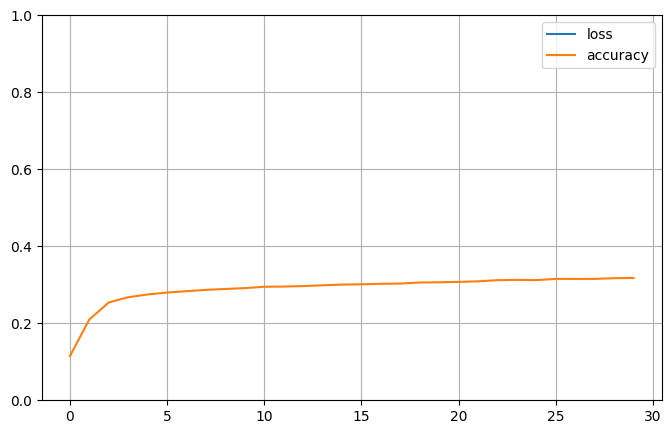

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [46]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 1.8350 - accuracy: 0.3239
test loss, test acc: [1.8349671363830566, 0.3239099979400635]


In [47]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[3151  770 1095 1210  367  187  485  905 1085  745]
 [1090 2024 1232  938  766  464  821  737 1178  750]
 [1239 1265 2090  860  436  417  847  936 1262  648]
 [1725 1141 1298 1640  454  242  728 1010 1083  679]
 [  77  320   33  115 8465  531  134   11  174  140]
 [  43  249  249   25  769 8037   83    4  288  253]
 [ 929 1148 1176  736  731  384 1813  859 1428  796]
 [1829 1096 1271  995  362  182  786 1679 1044  756]
 [1313 1069 1119  875  736  454  849  653 2125  807]
 [1365 1149 1095  825  692  515  875  806 1311 1367]]
              precision    recall  f1-score   support

           0       0.25      0.32      0.28     10000
           1       0.20      0.20      0.20     10000
           2       0.20      0.21      0.20     10000
           3       0.20      0.16      0.18     10000
           4       0.61      0.85      0.71     10000
           5       0.70      0.80      0.75     10000
           6       0.24      0.1

Test Accuracy:0.32391


Text(0.5, 1.0, 'Accuracy:0.324')

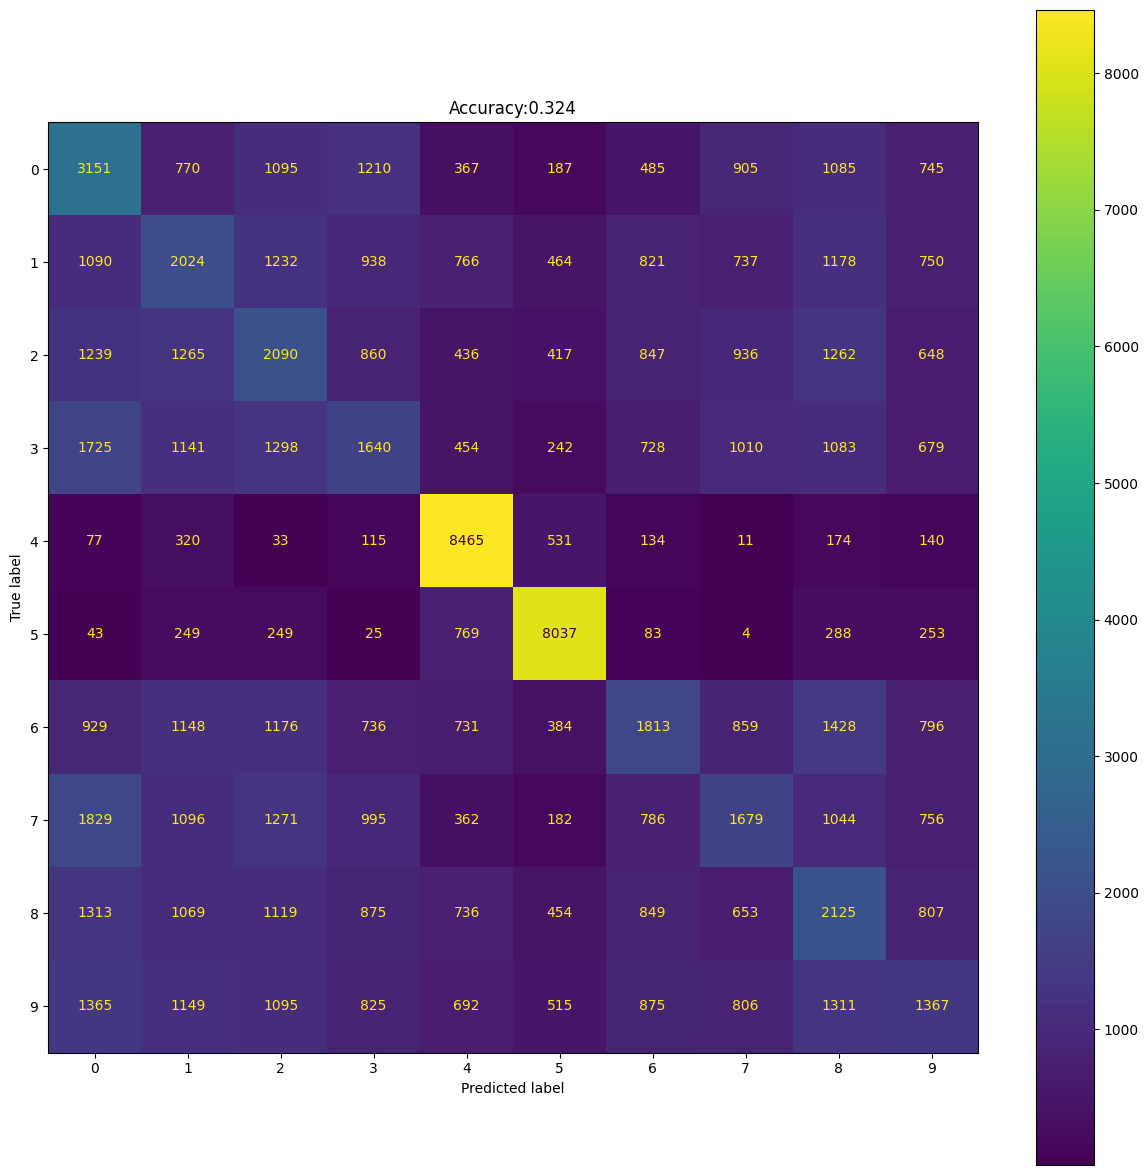

In [48]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')